In [1]:
import geopandas as gpd
from ipywidgets import interact
import ipywidgets as widgets
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import getpass, os
os.environ['PSQL_USER']='dengueadmin'
os.environ['PSQL_HOST']='localhost'
os.environ['PSQL_DB']='dengue'
os.environ['PSQL_PASSWORD']=getpass.getpass("Enter the database password: ")

Enter the database password: ········


In [3]:
os.chdir('..')
from infodenguepredict.data.infodengue import get_temperature_data, get_alerta_table, get_tweet_data
%matplotlib inline

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


## Fetching data from Infodengue
We can download the data from a full state. Let's pick Goiás.

In [4]:
go = get_alerta_table(state='GO', doenca='dengue')

In [5]:
go

,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,nivel,...,pop,tempmin,umidmax,receptivo,transmissao,nivel_inc,umidmed,umidmin,tempmed,tempmax
data_iniSE,,,,,,,,,,,,,,,,,,,,,
2021-10-24,202143,6.0,6,6,6,5205471,0.915351,57.2192,0,1,...,10486.0,24.714286,82.465986,0,0.0,1,None,None,None,None
2020-11-22,202048,0.0,0,0,0,5208152,0.000000,0.0000,0,1,...,3880.0,18.000000,94.000000,0,0.0,0,None,None,None,None
2021-12-12,202150,615.0,615,615,615,5208707,0.325130,40.0365,0,2,...,1536097.0,19.000000,100.000000,1,0.0,1,None,None,None,None
2021-12-19,202151,344.0,344,344,344,5208707,0.000000,22.3944,0,2,...,1536097.0,18.857143,100.000000,1,0.0,1,None,None,None,None
2021-12-12,202150,4.0,4,4,4,5208806,0.869909,8.8308,0,2,...,45296.0,19.000000,100.000000,1,0.0,0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-12,202150,0.0,0,0,0,5200506,0.000000,0.0000,0,1,...,1986.0,19.000000,100.000000,0,0.0,0,None,None,None,None
2021-12-19,202151,0.0,0,0,0,5200506,0.000000,0.0000,0,1,...,1986.0,18.857143,100.000000,0,0.0,0,None,None,None,None
2022-02-27,202209,7.0,7,7,7,5207105,0.882897,282.3720,0,2,...,2479.0,20.000000,90.129800,1,0.0,1,None,None,None,None


In [7]:
import geopandas as gpd
import geobr

In [48]:
municipios = geobr.read_municipality(code_muni='SP')
municipios

,code_muni,name_muni,code_state,abbrev_state,geometry
0,3500105.0,Adamantina,35.0,SP,"POLYGON ((-51.09093 -21.47214, -51.08788 -21.4..."
1,3500204.0,Adolfo,35.0,SP,"POLYGON ((-49.69668 -21.34430, -49.69703 -21.3..."
2,3500303.0,Aguaí,35.0,SP,"POLYGON ((-47.01254 -22.00527, -47.01076 -22.0..."
3,3500402.0,Águas Da Prata,35.0,SP,"POLYGON ((-46.73069 -21.94470, -46.73192 -21.9..."
4,3500501.0,Águas De Lindóia,35.0,SP,"POLYGON ((-46.63500 -22.45781, -46.62814 -22.4..."
...,...,...,...,...,...
640,3557006.0,Votorantim,35.0,SP,"POLYGON ((-47.42417 -23.52376, -47.41050 -23.5..."
641,3557105.0,Votuporanga,35.0,SP,"POLYGON ((-50.05318 -20.33614, -50.05005 -20.3..."
642,3557154.0,Zacarias,35.0,SP,"POLYGON ((-49.99872 -21.22678, -50.00113 -21.2..."
643,3557204.0,Chavantes,35.0,SP,"POLYGON ((-49.67777 -23.00317, -49.67543 -23.0..."


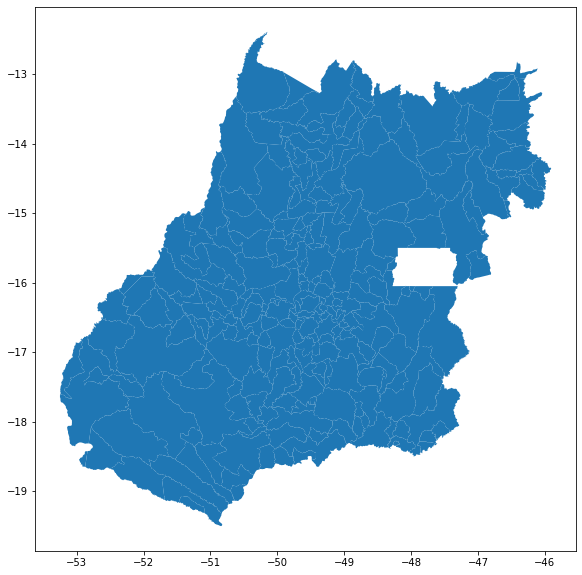

In [8]:
municipios['code_muni'] = municipios.code_muni.astype('int')
municipios.plot(figsize=(10,10));

In [11]:
goias = pd.merge(go.reset_index(), municipios,how='left', left_on='municipio_geocodigo', right_on='code_muni')
goias

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,...,nivel_inc,umidmed,umidmin,tempmed,tempmax,code_muni,name_muni,code_state,abbrev_state,geometry
0,2021-10-24,202143,6.0,6,6,6,5205471,0.915351,57.2192,0,...,1,None,None,None,None,5205471,Chapadão Do Céu,52.0,GO,"POLYGON ((-52.46971 -18.39153, -52.46918 -18.3..."
1,2020-11-22,202048,0.0,0,0,0,5208152,0.000000,0.0000,0,...,0,None,None,None,None,5208152,Gameleira De Goiás,52.0,GO,"POLYGON ((-48.76101 -16.38552, -48.75572 -16.3..."
2,2021-12-12,202150,615.0,615,615,615,5208707,0.325130,40.0365,0,...,1,None,None,None,None,5208707,Goiânia,52.0,GO,"POLYGON ((-49.26567 -16.51457, -49.26178 -16.5..."
3,2021-12-19,202151,344.0,344,344,344,5208707,0.000000,22.3944,0,...,1,None,None,None,None,5208707,Goiânia,52.0,GO,"POLYGON ((-49.26567 -16.51457, -49.26178 -16.5..."
4,2021-12-12,202150,4.0,4,4,4,5208806,0.869909,8.8308,0,...,0,None,None,None,None,5208806,Goianira,52.0,GO,"POLYGON ((-49.44946 -16.43796, -49.44978 -16.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156155,2021-12-12,202150,0.0,0,0,0,5200506,0.000000,0.0000,0,...,0,None,None,None,None,5200506,Aloândia,52.0,GO,"POLYGON ((-49.42983 -17.63654, -49.42564 -17.6..."
156156,2021-12-19,202151,0.0,0,0,0,5200506,0.000000,0.0000,0,...,0,None,None,None,None,5200506,Aloândia,52.0,GO,"POLYGON ((-49.42983 -17.63654, -49.42564 -17.6..."
156157,2022-02-27,202209,7.0,7,7,7,5207105,0.882897,282.3720,0,...,1,None,None,None,None,5207105,Diorama,52.0,GO,"POLYGON ((-51.29712 -16.18576, -51.29377 -16.1..."
156158,2021-12-12,202150,0.0,0,0,0,5201207,0.000000,0.0000,0,...,0,None,None,None,None,5201207,Anhanguera,52.0,GO,"POLYGON ((-48.22283 -18.34596, -48.22888 -18.3..."


In [12]:
goias = gpd.GeoDataFrame(goias)

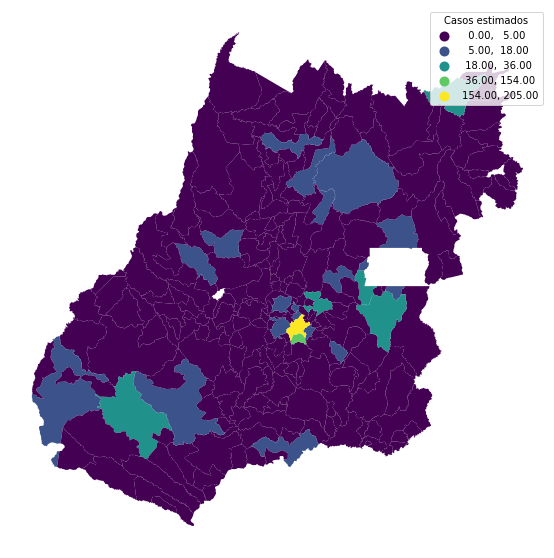

In [22]:
ax = goias[goias.SE==202144].plot(figsize=(10,10),
                             column='casos_est',
                             scheme="naturalbreaks",
                             legend=True,
                             legend_kwds={'title': "Casos estimados"},

                             );
ax.set_axis_off();

## Building the dashboard

In [4]:
from functools import lru_cache

In [5]:
@lru_cache(maxsize=27)
def get_dados(sigla='PR'):
    df = get_alerta_table(state=sigla, doenca='dengue')
    municipios = geobr.read_municipality(code_muni=sigla)
    municipios['code_muni'] = municipios.code_muni.astype('int')
    dados = pd.merge(df.reset_index(), municipios,how='left', left_on='municipio_geocodigo', right_on='code_muni')
    dados = dados.sort_values('SE')
    return gpd.GeoDataFrame(dados)


def gera_SE_seq(anoi, anof):
    ses=[]
    for a in range(anoi,anof+1):
        for w in range(1,52):
            w = str(w).zfill(2)
            ses.append(int(f'{a}{w}'))
    return ses

In [12]:
estado='TO'
gdf = get_dados(estado)
munis = list(set(gdf.name_muni))
try: 
    munis = sorted(munis)
except: pass
@interact
def painel(mun=widgets.Select(options=munis, description='Municipio'), week=widgets.SelectionSlider(options=gera_SE_seq(2021,2022)), variable=['casos_est','casos']):
    week = gdf.SE.max() if week > gdf.SE.max() else week
    fig,[ax1,ax2] = plt.subplots(1,2,figsize=(20, 10))
    gdf[gdf.SE==int(week)].plot(ax=ax1,column=variable,scheme="User_defined",
                             legend=True,
                            classification_kwds=dict(bins=[20,50,100,500,2000,5000]),
                             legend_kwds={'title': "Casos estimados",'loc':'lower right'})
    ax1.set_axis_off();
    ax1.set_title(str(week));
    sns.lineplot(data=gdf[gdf.name_muni==mun].reset_index(),x='data_iniSE', y=variable, ax=ax2)
    ax2.set_title(mun)
#     ax2.vlines(x=gdf[gdf.SE==int(week)].index,ymin=0,ymax=500)
    plt.show();
        

interactive(children=(Select(description='Municipio', options=('Abreulândia', 'Aguiarnópolis', 'Aliança Do Toc…

In [105]:
gdf

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,municipio_geocodigo,p_rt1,p_inc100k,Localidade_id,...,nivel_inc,umidmed,umidmin,tempmed,tempmax,code_muni,name_muni,code_state,abbrev_state,geometry


In [86]:
goias.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 156160 entries, 0 to 156159
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   data_iniSE           156160 non-null  datetime64[ns]
 1   SE                   156160 non-null  int64         
 2   casos_est            156160 non-null  float64       
 3   casos_est_min        156160 non-null  int64         
 4   casos_est_max        156160 non-null  int64         
 5   casos                156160 non-null  int64         
 6   municipio_geocodigo  156160 non-null  int64         
 7   p_rt1                156160 non-null  float64       
 8   p_inc100k            156160 non-null  float64       
 9   Localidade_id        156160 non-null  int64         
 10  nivel                156160 non-null  int64         
 11  versao_modelo        156160 non-null  object        
 12  municipio_nome       156160 non-null  object        
 13  tweet 